#### PICKING & UNPICKLING

In [1]:
import pickle

# Data to be pickled (any Python object can be pickled)
data = {
    'name': 'Alice',
    'age': 25,
    'hobbies': ['reading', 'hiking', 'coding']
}

# Pickling the data (writing the byte stream to a file)
with open('data.pickle', 'wb') as file:  # 'wb' means write binary
    pickle.dump(data, file)

print("Data has been pickled and saved to 'data.pickle' file.")

# Unpickling the data (reading the byte stream from a file and converting it back)
with open('data.pickle', 'rb') as file:  # 'rb' means read binary
    loaded_data = pickle.load(file)

print("Data has been unpickled:")
print(loaded_data)


Data has been pickled and saved to 'data.pickle' file.
Data has been unpickled:
{'name': 'Alice', 'age': 25, 'hobbies': ['reading', 'hiking', 'coding']}


**Content stored in 'data.pickle' looks like below**

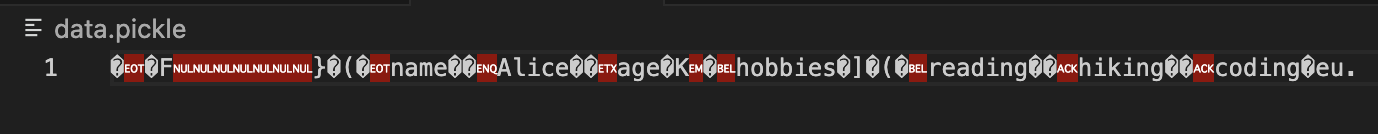

#### Pickling Multiple Objects

In [2]:
import pickle

# Data to be pickled
data1 = {'name': 'Bob', 'age': 30}
data2 = ['apple', 'banana', 'cherry']

# Pickling multiple objects
with open('multiple_data.pickle', 'wb') as file:
    pickle.dump(data1, file)
    pickle.dump(data2, file)

# Unpickling multiple objects
with open('multiple_data.pickle', 'rb') as file:
    loaded_data1 = pickle.load(file)
    loaded_data2 = pickle.load(file)

print(loaded_data1)  # Output: {'name': 'Bob', 'age': 30}
print(loaded_data2)  # Output: ['apple', 'banana', 'cherry']


{'name': 'Bob', 'age': 30}
['apple', 'banana', 'cherry']


**Content stored in 'multiple_data.pickle' looks like below**

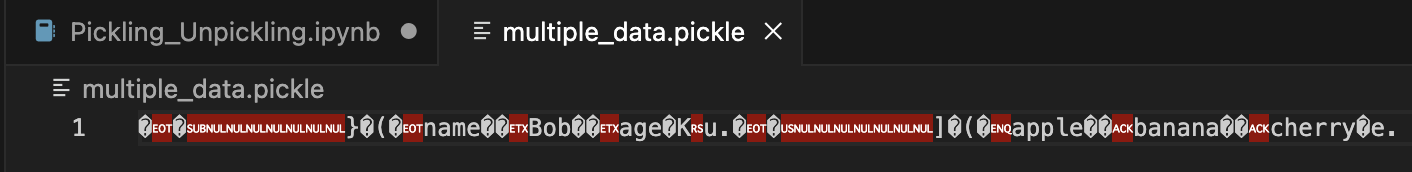

#### REAL TIME USE CASES

**1. Saving ML models**
- In machine learning, trained models often need to be saved and later reused without retraining. Pickling is commonly used to save the trained model to a file, and unpickling is used to load the model back when needed.

In [ ]:
# !conda install scikit-learn

In [13]:
import pickle
from sklearn.linear_model import LogisticRegression

# Train a machine learning model
model = LogisticRegression()
model.fit([[1, 2], [2, 3], [3, 4]], [0, 1, 0])

# Pickle the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, unpickle the model to use it
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
prediction = loaded_model.predict([[1.5, 2.5]])
print("predition: ",prediction)

# prediction1 = loaded_model.predict([[1.7, 2.7]])
# print("predition1: ",prediction1)

# prediction1 = loaded_model.predict([[1.9, 2.9]])
# print("predition1: ",prediction1)

# prediction1 = loaded_model.predict([[2, 3]])
# print("predition1: ",prediction1)

predition:  [0]


**Content in model.pkl looks like below**

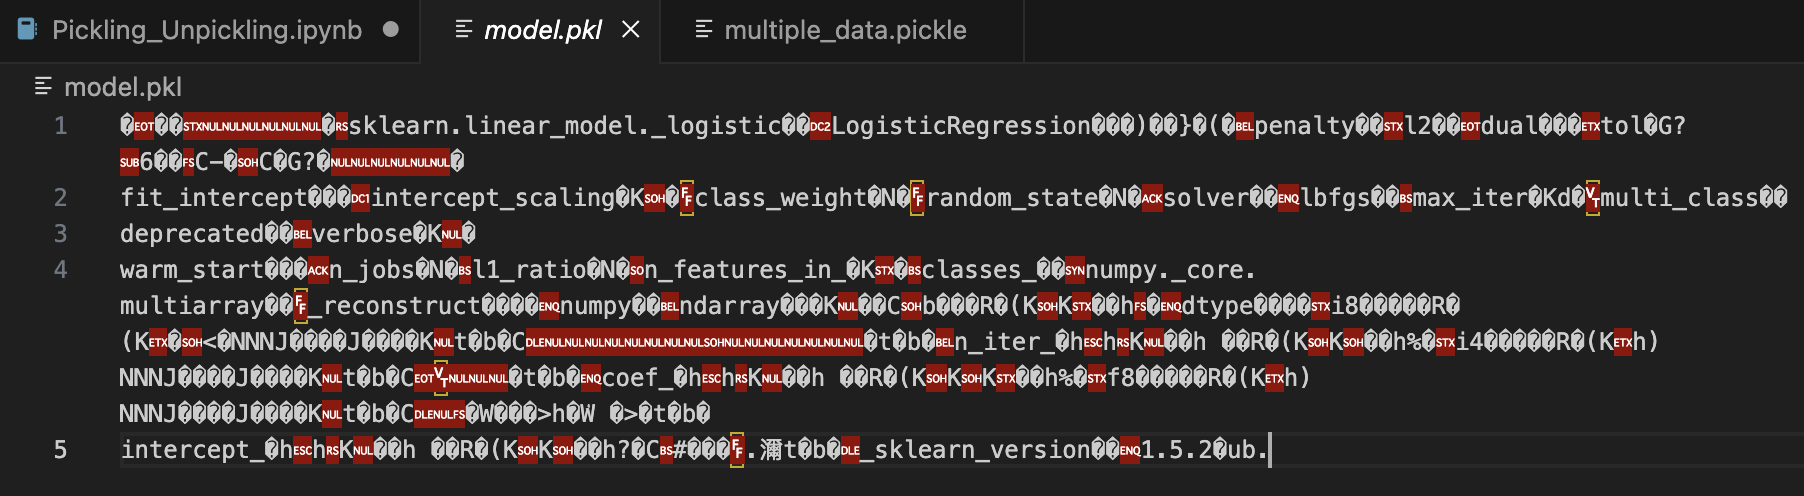

**2. Caching data in Web applications**
- In web applications, pickling can be used to cache data so that expensive computations (such as database queries or API calls) don't need to be repeated. By pickling the result of the computation and storing it in a cache, subsequent requests can quickly retrieve the result by unpickling the cached data.

In [16]:
# FIRST TIME RUN 
# THIS EXECUTES THE 'except' codeblock

import pickle
import time

def expensive_function():
    time.sleep(5)  # Simulating/Mimicking a time-consuming operation
    return {'result': 42} # assuming this is the result of the same time consuming operation

# Check if cached data exists
try:
    with open('cache.pickle', 'rb') as file:
        result = pickle.load(file)
    print("Loaded from cache:", result)
except FileNotFoundError:
    # If cache doesn't exist, compute and cache the result
    result = expensive_function()
    with open('cache.pickle', 'wb') as file:
        pickle.dump(result, file)
    print("Computed and cached:", result)


Computed and cached: {'result': 42}


**Content in cache.pickle looks like below**

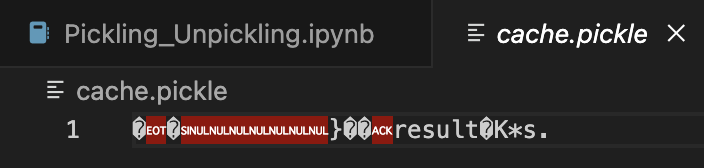

In [17]:
# SECOND TIME RUN 
# THIS EXECUTES THE 'try' codeblock

import pickle
import time

def expensive_function():
    time.sleep(5)  # Simulating/Mimicking a time-consuming operation
    return {'result': 42} # assuming this is the result of the same time consuming operation

# Check if cached data exists
try:
    with open('cache.pickle', 'rb') as file:
        result = pickle.load(file)
    print("Loaded from cache:", result)
except FileNotFoundError:
    # If cache doesn't exist, compute and cache the result
    result = expensive_function()
    with open('cache.pickle', 'wb') as file:
        pickle.dump(result, file)
    print("Computed and cached:", result)


Loaded from cache: {'result': 42}


**3. Data Sharing in distributed system**
- In distributed systems or parallel processing, data often needs to be transferred between different processes, threads, or nodes. Pickling allows complex Python objects to be serialized into a format that can be sent across the network or shared between processes.

**4. Saving web scraping data**
- Web scrapers often need to save large amounts of data, such as parsed HTML or structured data. Pickling can be used to save the entire scraped dataset to a file, and unpickling can restore it for later analysis.

In [ ]:
# !pip install bs4

In [24]:
import pickle
import requests
from bs4 import BeautifulSoup

# Scrape data from a website
url = 'https://example.com'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Pickle the scraped data to a file
with open('scraped_data.pickle', 'wb') as file:
    pickle.dump(soup, file)

# Later, unpickle the scraped data for analysis
with open('scraped_data.pickle', 'rb') as file:
    loaded_soup = pickle.load(file)

print(loaded_soup.title.text)


Example Domain


View the content of the 'scraped_data.pkl' here,
[text](scraped_data.pickle)

**5. Session Management in Web Applications**
- In some web frameworks, such as Flask, pickling is used to store user session data. The session data is serialized into a cookie or server-side storage and unpickled when the user returns

**6. Game Development: Saving Game States**
- In game development, you may want to allow players to save and load their progress. Pickling can be used to save the entire game state (player progress, inventory, scores, etc.) to a file, and unpickling restores the game state when loading.

**7. Data Pipelines**
- In data pipelines where preprocessing steps or intermediary results need to be saved for reuse, pickling can be used to store and retrieve these results without recalculating them.